# Basic statistics with Python - Part 1

# 1. Knowing the data

## 1.1 - Dataset that will be used in the project

### Pesquisa Nacional por Amostra de Domicílios - PNAD - 2015

<b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investigates annually, on a permanent basis, general characteristics of the population, education, work, income and housing and others, with variable periodicity, according to the information needs for the country, such as characteristics on migration, fertility, nuptiality, health, food security, among other topics. The survey of these statistics constitutes, throughout the 49 years of research, an important instrument for the formulation, validation and evaluation of policies oriented to socioeconomic development and the improvement of living conditions in Brazil.

### Data source

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variables used in the dataset

### Income

Monthly income from main job for people 10 years old and over.

### Age
Age of the resident on the reference date in years.

### Height
Height of the resident in meters.

### State

|Code|Description|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Gender

|Code|Description|
|---|---|
|0|Male|
|1|Female|

### Years of Study

|Code|Description|
|---|---|
|1|0 or less than a year|
|2|1 year|
|3|2 years|
|4|3 years|
|5|4 years|
|6|5 years|
|7|6 years|
|8|7 years|
|9|8 years|
|10|9 years|
|11|10 years|
|12|11 years|
|13|12 years|
|14|13 years|
|15|14 years|
|16|15 years or more|
|17|Not informed| 
||Not relevant |

### Color

|Code|Description|
|---|---|
|0|Indigenous|
|2|While|
|4|Black|
|6|Yellow|
|8|Brown|
|9|Not informed|

#### Disclaimer

The following treatments were performed on the original data:
1. the records where the <b>Rent</b> was invalid (999 999 999) were deleted;
2. the records where the <b>income</b> was missing were deleted;
3. only the records of the <b>Reference Persons</b> of each domicile (responsible for the domicile) were considered.

### Importing and reading the dataset

https://pandas.pydata.org/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/dataset.csv')

In [3]:
df

,State,Gender,Age,Color,Years of Study,Income,Height
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## 1.2 Data Types or Statistical Variables
***

# Qualitative (or Categorical) Variables

Categorical variables represent groupings of some kind. They are sometimes recorded as numbers, but the numbers represent categories rather than actual amounts of things. Variables that can be ordered or hierarchical.

In our dataset: State, Gender, Color, Years of Study

### ► Ordinal Variables
Groups that are ranked in a specific order.

Even though the dataset has an id for this column, the content is a string, but in this case we can rank the years of study. We don't perform any arithmetic operation in those values but we can rank them in a specifi order.

In [4]:
sorted(df['Years of Study'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### ► Nominal Variables
Groups with no rank or order between them.

In [5]:
sorted(df['State'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [6]:
sorted(df['Gender'].unique())

[0, 1]

In [7]:
sorted(df['Color'].unique())

[0, 2, 4, 6, 8]

# Quantitative Variables
When you collect quantitative data, the numbers you record represent real amounts that can be added, subtracted, divided, etc. There are two types of quantitative variables: discrete and continuous.

In our dataset: Age, Income, height

### ► Discrete variables (aka integer variables)

Variables that represent a count where possible values form a finite or enumerated set.

In [8]:
df['Age'].min()

13

In [9]:
df['Age'].max()

99

#### Disclaimer

The variable age can be classified in three different ways:
> 1. <b>Discrete</b> - when it represents full years (whole numbers);
> 2. <b>Continuous</b> - when it represents the exact age, being represented by fractions of years (13 years, 7 months, etc.); and
> 3. <b>Ordinal</b> - when it represents age groups.

### ► Continuous variables

Measurements of continuous or non-finite values. Variables that represent a count or measurement that assumes values on a continuous scale (actual numbers).

In [10]:
df['Height'].min()

1.339244614

In [11]:
df['Height'].max()

2.028496765

### Classification
<img  src='https://aprendeconalf.es/statistics/manual/img/introduction/variable_types.svg' width='70%' style="background-color:rgba(255, 255, 255, 1);">

# 2 Distribution of frequencies

The first step in a work of analysis is the knowledge of the behavior of the variables involved in the study. Using statistical techniques such as the analysis of <b> FREQUENCY DISTRIBUTIONS</b> and <b>HISTOGRMS</b> we can better assess how the phenomena under study are distributed.

## 2.1 Frequency distribution for qualitative variables
***

### Method 1 - Separate pandas Series

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [12]:
gender_frequency = df['Gender'].value_counts()
gender_frequency

0    53250
1    23590
Name: Gender, dtype: int64

In [13]:
gender_frequency_normalized = df['Gender'].value_counts(normalize=True)
gender_frequency_normalized

0    0.692998
1    0.307002
Name: Gender, dtype: float64

In [14]:
gender_frequency_percent = df['Gender'].value_counts(normalize=True) * 100
gender_frequency_percent

0    69.299844
1    30.700156
Name: Gender, dtype: float64

In [15]:
gender_distribution_df = pd.DataFrame({'Frequency': gender_frequency, 'Frequency Normalized': gender_frequency_normalized, 'Frequency Percentage': gender_frequency_percent})
gender_distribution_df.index = ['Male', 'Female']
gender_distribution_df.rename_axis('Gender', axis='columns', inplace=True)
gender_distribution_df

Gender,Frequency,Frequency Normalized,Frequency Percentage
Male,53250,0.692998,69.299844
Female,23590,0.307002,30.700156


### Method 2 - pandas crosstab

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [16]:
genders = {0: 'Male', 1: 'Female'}
colors = {0: 'Indigenous', 2: 'White', 4: 'Black', 6: 'Yellow', 8: 'Brown', 9: 'Not informed'}

In [17]:
frequency_cross_gender_and_color = pd.crosstab(df['Gender'], df['Color'])
frequency_cross_gender_and_color.index = genders.values()
frequency_cross_gender_and_color.rename(columns=colors, inplace=True)
frequency_cross_gender_and_color

Color,Indigenous,White,Black,Yellow,Brown
Male,256,22194,5502,235,25063
Female,101,9621,2889,117,10862


In [18]:
frequency_cross_gender_and_color_percentage = pd.crosstab(df['Gender'], df['Color'], normalize=True) * 100
frequency_cross_gender_and_color_percentage.index = genders.values()
frequency_cross_gender_and_color_percentage.rename(columns=colors, inplace=True)
frequency_cross_gender_and_color_percentage

Color,Indigenous,White,Black,Yellow,Brown
Male,0.333160,28.883394,7.160333,0.305830,32.617126
Female,0.131442,12.520822,3.759761,0.152264,14.135867


### Crosstab Analysis: Gender and Color x Income

In [19]:
frequency_cross_gender_and_color_by_income_mean = pd.crosstab(df['Gender'], df['Color'], aggfunc='mean', values = df["Income"]).round(2)
frequency_cross_gender_and_color_by_income_mean.index = genders.values()
frequency_cross_gender_and_color_by_income_mean.rename(columns=colors, inplace=True)
frequency_cross_gender_and_color_by_income_mean

Color,Indigenous,White,Black,Yellow,Brown
Male,1081.71,2925.74,1603.86,4758.25,1659.58
Female,2464.39,2109.87,1134.60,3027.34,1176.76


## 2.2 Frequency distribution for quantitative variables
***

### Step 1 - Specify the limits of each class

This is the classification of the income groups:

<b>A</b> ► More than 20 MW

<b>B</b> ► Fromm 10 to 20 MW

<b>C</b> ► From 4 to 10 MW

<b>D</b> ► From 2 to 4 MW

<b>E</b> ► Less or equal to 2 MW

where <b>MW</b> is the value of the minimum age at the time of the dataset was built: <b>R$ 788,00</b> (2015):

<b>A</b> ► More than 15.760

<b>B</b> ► From 7.880 to 15.760

<b>C</b> ► From 3.152 to 7.880

<b>D</b> ► From 1.576 to 3.152

<b>E</b> ► Less or equal to 1.576


In [20]:
df['Income'].min()

0

In [21]:
df['Income'].max()

200000

It looks like the dataset has outlier in the Income column. Could it be true that someone earns 200.000 reais per month? If it is possible the question become: is this person (or people) relevant to this EDA?

In [22]:
classes_limits = [df['Income'].min(), 1576, 3152, 7880, 15760, df['Income'].max()]
labels = list('ABCDE')
labels.reverse()

### Step 2 - Create the frequency table
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [23]:
cut_by_income_class = pd.cut(x = df["Income"], bins=classes_limits, labels=labels, include_lowest=True)
cut_by_income_class

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Income, Length: 76840, dtype: category
Categories (5, object): [E < D < C < B < A]

In [24]:
cut_by_income_class.value_counts()

E    49755
D    16700
C     7599
B     2178
A      608
Name: Income, dtype: int64

In [25]:
cut_by_income_class.value_counts(normalize=True) * 100

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Income, dtype: float64

In [26]:
income_class_frequency_distribution_quantitative = pd.DataFrame({'Frequency': cut_by_income_class.value_counts(), '%': cut_by_income_class.value_counts(normalize=True) * 100 })
income_class_frequency_distribution_quantitative

,Frequency,%
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [27]:
income_class_frequency_distribution_quantitative.sort_index(ascending=False)

,Frequency,%
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


## 2.3 Frequency distribution for quantitative variables (fixed amplitude classes)
***
By fixed amplitude I mean that the classes will have the same size

### Importing libraries

http://www.numpy.org/

In [28]:
import numpy as np

### Step 1 - Defining the number of classes

#### Sturges rule

# $$k = 1 + \frac {10}{3}\log_{10}n$$

The Sturges rule is a method for defining the number of classes, based on the total of observations of a variable.

n = number of observations for the frequency distribution
k = what is the ideal number of classes too visualize the frequency depending on the number of observation that the dataset has

### Math review:
Logarithms:

https://www.youtube.com/watch?v=1dUSNdZspQc&list=PLmdFyQYShrjcWl13fndjdWRBTF0C-tHG3&index=2

Sturges rule

https://www.youtube.com/watch?v=B6-rWnNCbx0

https://www.youtube.com/watch?v=J8W2Kj5xnsU

In [29]:
n = df.shape[0]
n

76840

In [30]:
np.log10(n)

4.885587356189656

In [31]:
int(round(pow(10, 4.885587356189656), 0))

76840

In [32]:
k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

In [33]:
k = int(k.round(0))
k

17

### Step 2 - Create the frequency table

In [34]:
frequency_table_using_sturges_rule = pd.value_counts(
    pd.cut(x = df['Income'], bins=k, include_lowest=True),sort=False
)
frequency_table_using_sturges_rule

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Income, dtype: int64

In [35]:
frequency_table_using_sturges_rule_percentual = pd.value_counts(
    pd.cut(x = df['Income'], bins=k, include_lowest=True),sort=False, normalize=True
) * 100
frequency_table_using_sturges_rule_percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Income, dtype: float64

In [36]:
income_class_frequency_distribution_quantitative_sturges = pd.DataFrame({'Frequency': frequency_table_using_sturges_rule, '%': frequency_table_using_sturges_rule_percentual })
income_class_frequency_distribution_quantitative_sturges

,Frequency,%
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


## 2.4 Histogram
***

The <b>HISTOGRAM</b> is the graphical representation of a frequency distribution. It is a graph formed by a set of rectangles placed side by side, where the area of each rectangle is proportional to the frequency of the class it represents.

### Importing the library

https://seaborn.pydata.org/

In [37]:
import seaborn as sns

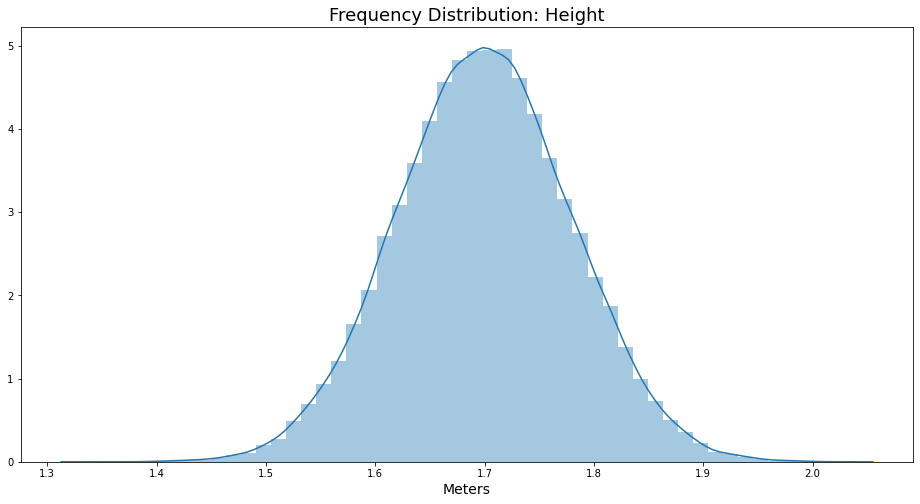

In [125]:
ax = sns.distplot(df["Height"])
ax.figure.set_size_inches(16,8)
ax.set_title('Frequency Distribution: Height', fontsize = 18)
ax.set_xlabel('Meters', fontsize=14)
ax


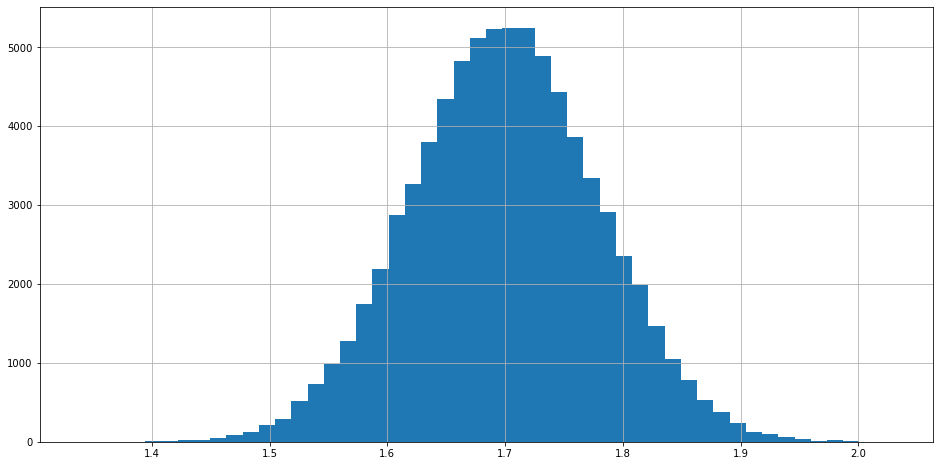

In [39]:
df['Height'].hist(bins=50, figsize=(16,8))

In [40]:
income_class_frequency_distribution_quantitative

,Frequency,%
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


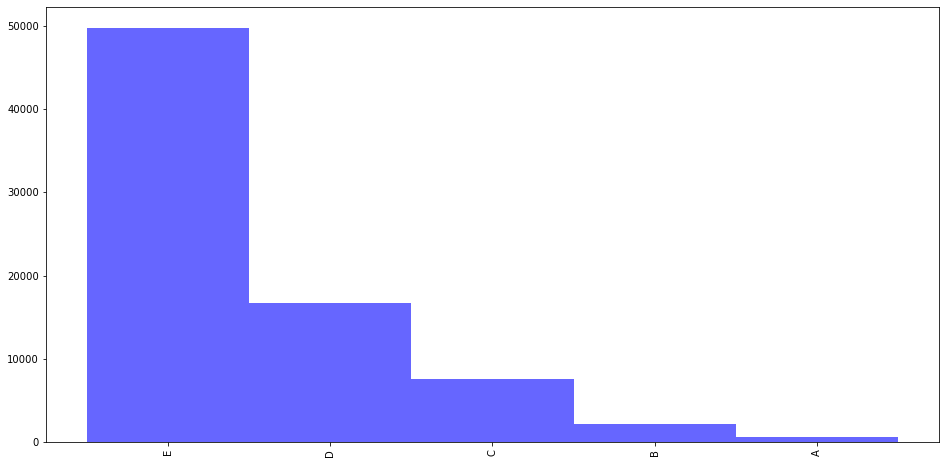

In [41]:
income_class_frequency_distribution_quantitative["Frequency"].plot.bar(width=1, color='blue', alpha=0.6, figsize=(16,8))

# 3 Measures of Central Tendency
***

This is a part of descriptive statistics.

## DataFrame

In [42]:
central_tendency_df = pd.DataFrame(data = {
    'Nathan': [8,10,4,8,6,10,8],
    'Fernanda': [10,10,6,3,9,10,7],
    'Denise': [9,8,7,6,9,4,8]
    },
    index = ['Math', 'Portuguese', 'English', 'Geography', 'History', 'Physics', 'Chemistry']
)
central_tendency_df.rename_axis('Subject', axis = 'columns', inplace = True)
central_tendency_df

Subject,Nathan,Fernanda,Denise
Math,8,10,9
Portuguese,10,10,8
English,4,6,7
Geography,8,3,6
History,6,9,9
Physics,10,10,4
Chemistry,8,7,8


## 3.1 Mean
***

It is represented by $\mu$ when it refers to the populations and $\bar{X}$ when it comes to the sample

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

where 

$n$ = number of observations (records)

$X_i$ = value of the i-th observation (record)

The center of mass of a variable's distribution. It's the center that balances a variable.
The mean is sensible to the extremes, that's why sometimes the mean isn't the best measurement.
For example the the variable `Income` there are a lot of people with low income and a few people with a high income. This variable is not balanced so the mean will not represent this variable well.

In [43]:
nathan_grades = central_tendency_df['Nathan'].to_list()
nathan_grades

[8, 10, 4, 8, 6, 10, 8]

In [44]:
subjects = central_tendency_df.index.to_list()
subjects

['Math',
 'Portuguese',
 'English',
 'Geography',
 'History',
 'Physics',
 'Chemistry']

In [45]:
nathan_grades_mean = np.sum(nathan_grades) / len(subjects)
nathan_grades_mean.round(1)

7.7

In [46]:
round(central_tendency_df['Nathan'].mean(), 1)

7.7

In [47]:
round(df['Income'].mean(), 2)

2000.38

In [48]:
df.head()

,State,Gender,Age,Color,Years of Study,Income,Height
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


#### Calculate average Income by Gender

In [134]:
df.groupby(['Gender'])['Income'].mean()

Gender
0    1963.664714
1    2083.268292
Name: Income, dtype: float64

## 3.2 Median
***

The median refers to a data value that is positioned in the middle of an ordered dataset. Let's order the ages dataset: ordered_ages = [13,20,20,34,40,45] There is no middle value in the middle because the length of this data set is even. If we try to apply the base formula to get the median posisition it wouldn't work: n + 1 / 2 where n is the length of the data set so: 6 +1 / 2 = 3.5 and there is no position 3.5 in the dataset. In this case to get the median we can calculate the average of the two values that are beside the position 3.5. What are they? position 3 and 4 or to get the values: 20 and 34. Let's calculate the average of these two numbers: 20 + 34 / 2 = 27. The median of this dataset is 27

To obtain the median of a data set we should proceed as follows:
1. Sort the data set;
2. Identify the number of observations (records) of the data set ($n$);
3. Identify the median element:

> When $n$ is odd, the position of the median element will be obtained as follows:


# $$Element{Md} = \frac{n+1}2$$

> Even $n$ is even, the position of the median element shall be obtained as follows:


# $$Element{Md} = \frac{n}2$$

4. Obtain the median:

> When $n$ is odd:


# $$Md = X_{Element{Md}}$$

> When $n$ is even:


# $$Md = \frac{X_{Element{Md}} + X_{Element{Md}+1}}2$$
***

### Example 1 - n is odd

In [50]:
dataset_odd = [6,4,3,9,1]
dataset_odd_n = len(dataset_odd)
dataset_odd.sort()
median_dataset_odd_index = int((dataset_odd_n + 1) / 2)
print(dataset_odd, median_dataset_odd_index, np.median(dataset_odd))
median_dataset_odd = dataset_odd[median_dataset_odd_index - 1]
median_dataset_odd


[1, 3, 4, 6, 9] 3 4.0


4

In [51]:
grades_nathan = central_tendency_df['Nathan'].sort_values().reset_index()
grades_nathan

,index,Nathan
0,English,4
1,History,6
2,Math,8
3,Geography,8
4,Chemistry,8
5,Portuguese,10
6,Physics,10


In [52]:
n = grades_nathan.shape[0]

median_element = (n + 1) / 2
median_element
print(n, median_element)
print(grades_nathan.loc[median_element -1 ])

7 4.0
index     Geography
Nathan            8
Name: 3, dtype: object


In [53]:
grades_nathan.median()

Nathan    8.0
dtype: float64

### Example 2 - n is even

In [54]:
grades_nathan = central_tendency_df['Nathan'].sample(6, random_state=101).sort_values().reset_index()
n = grades_nathan.shape[0]
median_position= int(n / 2)
print(grades_nathan.median(), n, median_position)
grades_nathan

Nathan    8.0
dtype: float64 6 3


,index,Nathan
0,English,4
1,History,6
2,Math,8
3,Chemistry,8
4,Physics,10
5,Portuguese,10


In [55]:
median_even = (grades_nathan.loc[median_position -1] + grades_nathan.loc[median_position ])
median_even

index     MathChemistry
Nathan               16
dtype: object

### Obtaining the median in our dataset

In [56]:
df['Income'].median()

1200.0

In [57]:
df['Income'].quantile()

1200.0

Calculating the income median manually

In [58]:
n = df['Income'].shape[0]
print("n = {}. Is even? {}".format(n, n % 2 == 0))
values = df['Income'].values
values.sort()
median_position = int(n / 2)
median = (values[median_position -1] +  values[median_position]) / 2
median

n = 76840. Is even? True


1200.0

## 3.3 Mode
***

You can define mode as the most frequent value of a data set. The mode is widely used for qualitative data. If the dataset has no repeated values we say it doesn't have a mode.

In [59]:
central_tendency_df

Subject,Nathan,Fernanda,Denise
Math,8,10,9
Portuguese,10,10,8
English,4,6,7
Geography,8,3,6
History,6,9,9
Physics,10,10,4
Chemistry,8,7,8


In [60]:
central_tendency_df.mode()

Subject,Nathan,Fernanda,Denise
0,8.0,10.0,8
1,NaN,NaN,9


In [61]:
example = pd.Series([1,2,2,3,4,4,5,6,6])
example.mode()

0    2
1    4
2    6
dtype: int64

In [62]:
central_tendency_df['Nathan'].value_counts()

8     3
10    2
6     1
4     1
Name: Nathan, dtype: int64

### Obtaining the mode in our dataset

In [63]:
df['Income'].mode()

0    788
dtype: int64

In [64]:
df['Height'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

## 3.4 Relation between mean, median and mode

What is skewness in statistics?

https://www.thoughtco.com/what-is-skewness-in-statistics-3126242

https://www.cuemath.com/learn/relationship-between-mean-median-mode/

<img src='https://s3.thingpic.com/images/KW/GA7Q8fXFwKJXVdtbBEwuEisB.jpeg' width='50%'>

### Analysing the distribution of Incomes

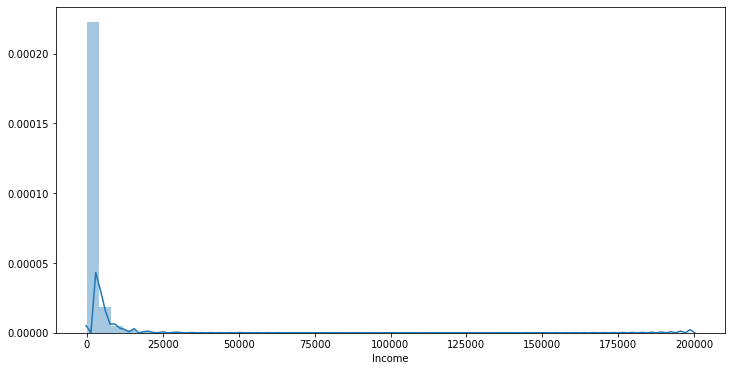

In [65]:
ax = sns.distplot(df['Income'])
ax.figure.set_size_inches(12,6)
ax

Analysing the plot I see that there is some outliers in the range of 200000 that is pulling the curve to the right what makes difficult to even see the shape of the relations. Let's take a sample of this series but removing these outliers to have a better visualization.

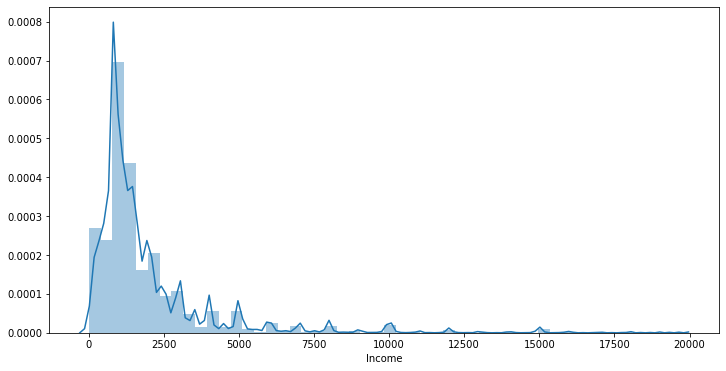

In [66]:
ax2 = sns.distplot(df.query('Income < 20000')['Income'])
ax2.figure.set_size_inches(12,6)
ax2

Let's verify the descirptive statistics about this dataset means what I expect: Positively skewed = Mean > Median > Mode

In [67]:
print(df['Income'].min(), df['Income'].max())

0 200000


In [68]:
mean = df['Income'].mean()
mean

2000.3831988547631

In [69]:
median = df['Income'].median()
median

1200.0

In [70]:
mode = df['Income'].mode()[0]
mode

788

In [71]:
is_positively_skewed = mean > median > mode
is_positively_skewed

True

***

### Analysing the distribution of Heights

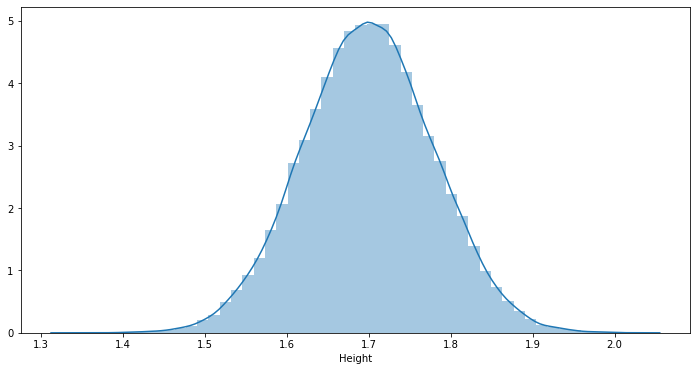

In [72]:
ax = sns.distplot(df['Height'])
ax.figure.set_size_inches(12,6)
ax

In [73]:
mode = df['Height'].mode()
mode[0]

1.56812756

In [74]:
mean = df['Height'].mean()
mean

1.6995124540575814

In [75]:
median = df['Height'].median()
median

1.6993247325

We can consider with a low error rate that the distribution for the variable `Height` is normal

***

### Analysing the distribution of Years of Study

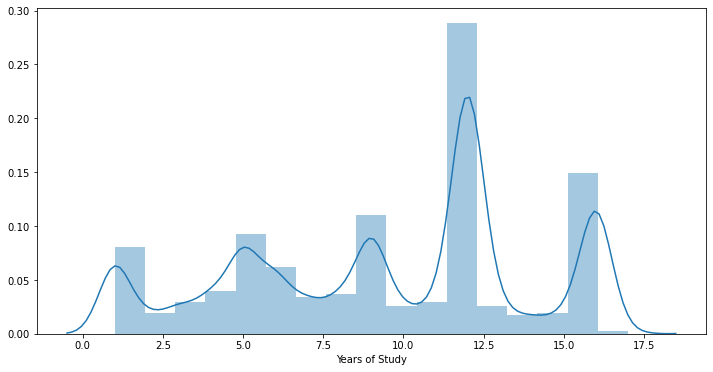

In [76]:
ax = sns.distplot(df['Years of Study'], bins = 17)
ax.figure.set_size_inches(12,6)
ax

In [77]:
mode = df['Years of Study'].mode()
mode[0]

12

In [78]:
mean = df['Years of Study'].mean()
mean

9.469664237376367

In [79]:
median = df['Years of Study'].median()
median

11.0

In [80]:
is_negatively_skewed = mean < median < mode
is_negatively_skewed

0    True
dtype: bool

# 4 Measures of separation / Dividing measures
***

## 4.1 Quartile, Decile and Percentile</font>
***

There are a number of similar measures of position in their design to the median, although they are not measures of central tendency. As we know, the median divides the distribution into two equal parts as to the number of elements of each part. The quartiles make it possible to divide the distribution into four equal parts as to the number of elements of each one; the deciles into ten parts and the percentiles into one hundred equal parts.

In [81]:
df['Income'].quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Income, dtype: float64

In [82]:
decile = [i / 10 for i in range(1,10)]
df['Income'].quantile(decile)

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Income, dtype: float64

In [83]:
percentile = [i / 100 for i in range(1,100)]
df['Income'].quantile(percentile)

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Income, Length: 99, dtype: float64

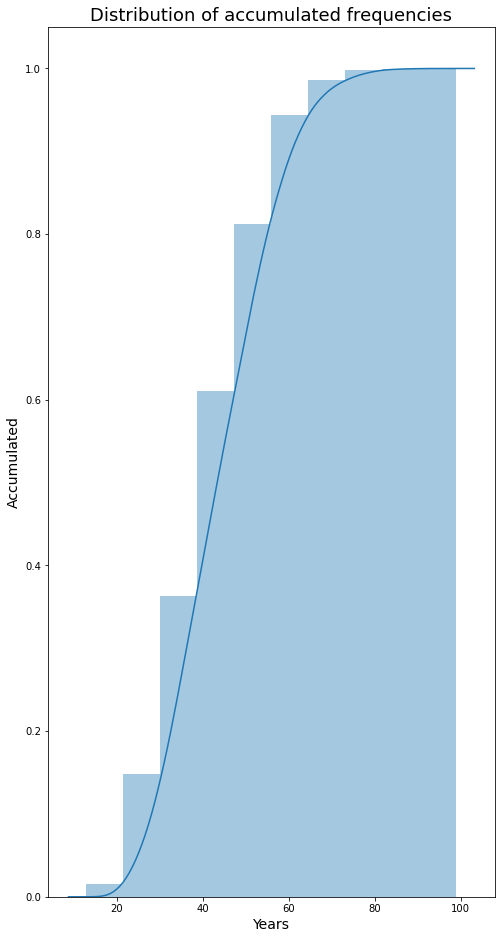

In [84]:
ax = sns.distplot(df['Age'], hist_kws={'cumulative': True,}, kde_kws={'cumulative': True}, bins=10)
ax.figure.set_size_inches(8,16)
ax.set_title('Distribution of accumulated frequencies', fontsize=18)
ax.set_ylabel('Accumulated', fontsize=14)
ax.set_xlabel('Years', fontsize=14)
ax

In [85]:
decile = [i / 10 for i in range(1,10)]
df['Age'].quantile(decile)

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Age, dtype: float64

## 4.2 Box-plot
***

A box plot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.

<img src='https://www.simplypsychology.org/boxplot.jpg?ezimgfmt=rs:555x285/rscb20/ng:webp/ngcb20' width='65%'>
<img src='https://www.simplypsychology.org/bloxplots-skewed.jpg?ezimgfmt=rs:523x386/rscb20/ng:webp/ngcb20' width='65%'>

## Definitions
### Minimum Score

The lowest score, excluding outliers (shown at the end of the left whisker).

### Lower Quartile

Twenty-five percent of scores fall below the lower quartile value (also known as the first quartile).

### Median

The median marks the mid-point of the data and is shown by the line that divides the box into two parts (sometimes known as the second quartile). Half the scores are greater than or equal to this value and half are less.

### Upper Quartile

Seventy-five percent of the scores fall below the upper quartile value (also known as the third quartile). Thus, 25% of data are above this value.

### Maximum Score

The highest score, excluding outliers (shown at the end of the right whisker).

### Whiskers

The upper and lower whiskers represent scores outside the middle 50% (i.e. the lower 25% of scores and the upper 25% of scores).

### The Interquartile Range (or IQR)

This is the box plot showing the middle 50% of scores (i.e., the range between the 25th and 75th percentile).


IQR = Q3 - Q1

min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

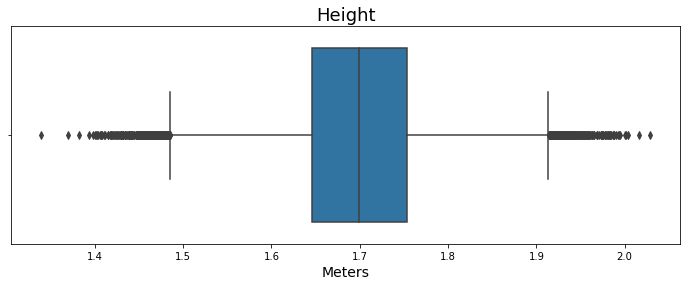

In [86]:
ax = sns.boxplot(x = 'Height', data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title("Height", fontsize=18)
ax.set_xlabel('Meters', fontsize=14)
ax

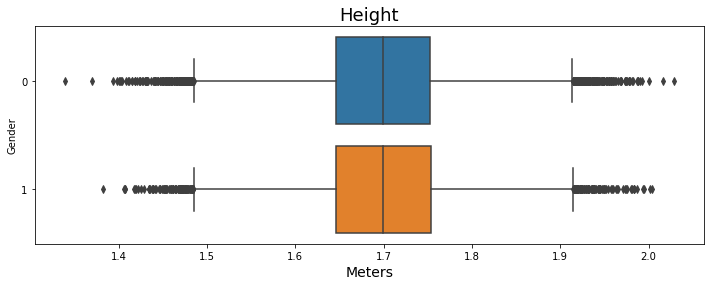

In [87]:
ax = sns.boxplot(x = 'Height', y = 'Gender',  data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title("Height", fontsize=18)
ax.set_xlabel('Meters', fontsize=14)
ax

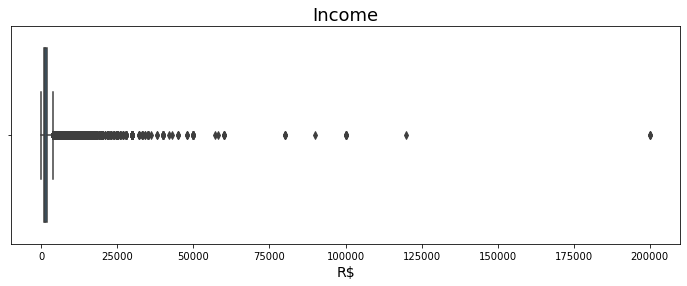

In [88]:
ax = sns.boxplot(x = 'Income',  data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title("Income", fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

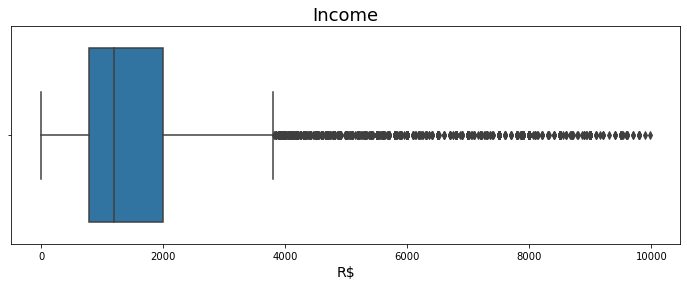

In [89]:
ax = sns.boxplot(x = 'Income',  data=df.query('Income < 10000'), orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title("Income", fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

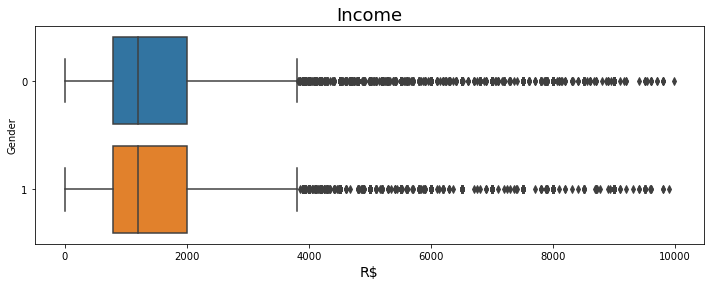

In [90]:
ax = sns.boxplot(x = 'Income', y='Gender', data=df.query('Income < 10000'), orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title("Income", fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

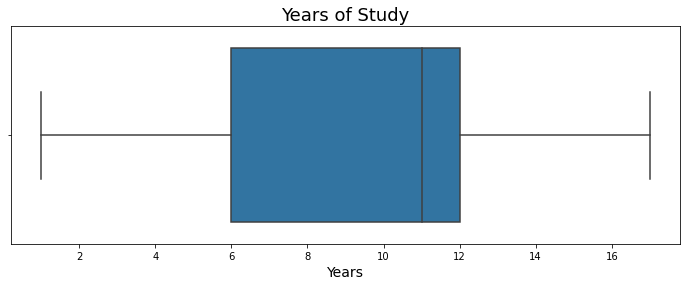

In [91]:
ax = sns.boxplot(x = 'Years of Study', data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title("Years of Study", fontsize=18)
ax.set_xlabel('Years', fontsize=14)
ax

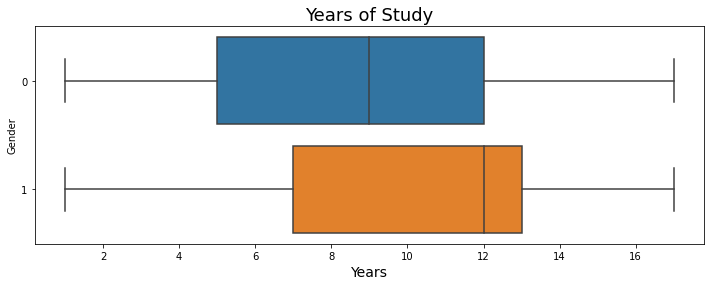

In [92]:
ax = sns.boxplot(x = 'Years of Study', y='Gender', data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title("Years of Study", fontsize=18)
ax.set_xlabel('Years', fontsize=14)
ax

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# 5 Measures of dispersion
***

Although position measurements provide a fairly important summary of data, they may not be sufficient to characterise distinct sets, especially when observations of a particular distribution present very dispersed data.

## 5.1 Mean absolute deviation
***

https://www.geogebra.org/m/UaMEvgyH


# $$MAD = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In the mean absolute deviation we ignore the signs in case the numbers are negative. This is expressed in the formula by the | character. If the mean is 10 and we calculate 8 - 10 we would have the result -2. In the MAD we would consider only two and ignore the negative sign.

In [93]:
central_tendency_df.describe()

Subject,Nathan,Fernanda,Denise
count,7.000000,7.000000,7.000000
mean,7.714286,7.857143,7.285714
std,2.138090,2.672612,1.799471
min,4.000000,3.000000,4.000000
25%,7.000000,6.500000,6.500000
50%,8.000000,9.000000,8.000000
75%,9.000000,10.000000,8.500000
max,10.000000,10.000000,9.000000


In [94]:
central_tendency_df

Subject,Nathan,Fernanda,Denise
Math,8,10,9
Portuguese,10,10,8
English,4,6,7
Geography,8,3,6
History,6,9,9
Physics,10,10,4
Chemistry,8,7,8


In [95]:
grades_nathan = central_tendency_df[['Nathan']].copy(deep=True)
grades_nathan

Subject,Nathan
Math,8
Portuguese,10
English,4
Geography,8
History,6
Physics,10
Chemistry,8


In [96]:
mean_grade_nathan = grades_nathan.mean()[0]
mean_grade_nathan

7.714285714285714

In [97]:
grades_nathan['Deviation'] = grades_nathan['Nathan'] - mean_grade_nathan
grades_nathan

Subject,Nathan,Deviation
Math,8,0.285714
Portuguese,10,2.285714
English,4,-3.714286
Geography,8,0.285714
History,6,-1.714286
Physics,10,2.285714
Chemistry,8,0.285714


It's possible to see that there are negative deviations. It happens because the mean os 7.71. Let's take the grade for english. If I calculate 4 - 7 we'll have a negative result, but for absolute deviation we don't want negative values.

In [98]:
grades_nathan['Deviation'].sum()

-8.881784197001252e-16

In [99]:
grades_nathan['| Absolute Deviation |'] = grades_nathan['Deviation'].abs()
grades_nathan

Subject,Nathan,Deviation,| Absolute Deviation |
Math,8,0.285714,0.285714
Portuguese,10,2.285714,2.285714
English,4,-3.714286,3.714286
Geography,8,0.285714,0.285714
History,6,-1.714286,1.714286
Physics,10,2.285714,2.285714
Chemistry,8,0.285714,0.285714


In [100]:
grades_nathan['| Absolute Deviation |'].sum()

10.857142857142854

We only get positive values because we want to calculate the mean of all deviations. If we get negative values the sum of all deviation will be 0 just like we had the examples above. It doesn;t make sense to calculate the mean of 0.

In [101]:
MAD = grades_nathan['| Absolute Deviation |'].mean()
MAD

1.5510204081632648

In [102]:
central_tendency_df['Nathan'].mad()

1.5510204081632648

## 5.2 Variance
***

The variance is constructed from the differences between each observation and the mean of the data, that is, the deviation around the mean. In the variance calculation, the deviations around the mean are squared. It's basically the sum of the squared deviations divided by the nymber of observations. We don't care about the sign here.

### Populational variance

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Sample variance

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$


Why n - 1? Bessel correction: https://en.wikipedia.org/wiki/Bessel%27s_correction

In statistics it is very important to distinguish between population and sample. A population is defined as all members (e.g. occurrences, prices, annual returns) of a specified group. Population is the whole group.

A sample is a part of a population that is used to describe the characteristics (e.g. mean or standard deviation) of the whole population. The size of a sample can be less than 1%, or 10%, or 60% of the population, but it is never the whole population.

In [103]:
grades_nathan['(Deviation)^2'] = grades_nathan['Deviation'].pow(2)
grades_nathan

Subject,Nathan,Deviation,| Absolute Deviation |,(Deviation)^2
Math,8,0.285714,0.285714,0.081633
Portuguese,10,2.285714,2.285714,5.224490
English,4,-3.714286,3.714286,13.795918
Geography,8,0.285714,0.285714,0.081633
History,6,-1.714286,1.714286,2.938776
Physics,10,2.285714,2.285714,5.224490
Chemistry,8,0.285714,0.285714,0.081633


In [104]:
sample_variance = grades_nathan['(Deviation)^2'].sum() / (grades_nathan.shape[0] - 1)
sample_variance

4.57142857142857

In [105]:
sample_variance_with_pandas = grades_nathan['Nathan'].var()
sample_variance_with_pandas

4.57142857142857

## 5.3 Standard deviation
***

One of the restrictions of variance is that it provides measures in squares of the original units - the variance of length measures, for example, is in area units. Therefore, the fact that the units are different makes it difficult to compare the dispersion with the variables that define it. One way to eliminate this difficulty is to consider its square root.

### Populational Standard Deviation

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Sample Standard Deviation

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$



Square roots:

https://www.youtube.com/watch?v=w8vqUMIVT1c

In [106]:
grades_nathan

Subject,Nathan,Deviation,| Absolute Deviation |,(Deviation)^2
Math,8,0.285714,0.285714,0.081633
Portuguese,10,2.285714,2.285714,5.224490
English,4,-3.714286,3.714286,13.795918
Geography,8,0.285714,0.285714,0.081633
History,6,-1.714286,1.714286,2.938776
Physics,10,2.285714,2.285714,5.224490
Chemistry,8,0.285714,0.285714,0.081633


In [107]:
np.sqrt(sample_variance_with_pandas)

2.1380899352993947

In [108]:
standard_deviation = grades_nathan['Nathan'].std()
standard_deviation

2.1380899352993947

In [110]:
central_tendency_df

Subject,Nathan,Fernanda,Denise
Math,8,10,9
Portuguese,10,10,8
English,4,6,7
Geography,8,3,6
History,6,9,9
Physics,10,10,4
Chemistry,8,7,8


In [111]:
central_tendency_df.mean()

Subject
Nathan      7.714286
Fernanda    7.857143
Denise      7.285714
dtype: float64

In [112]:
central_tendency_df.median()

Subject
Nathan      8.0
Fernanda    9.0
Denise      8.0
dtype: float64

In [113]:
central_tendency_df.mode()

Subject,Nathan,Fernanda,Denise
0,8.0,10.0,8
1,NaN,NaN,9


In [114]:
central_tendency_df.std()

Subject
Nathan      2.138090
Fernanda    2.672612
Denise      1.799471
dtype: float64

In [117]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [118]:
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [120]:
dataset.groupby(['Sexo']).std().loc['M']

Idade    16.64532
Name: M, dtype: float64